# K-Nearest Neighbor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from prepare import prep_titanic, train_val_test, theometrics, rubric

## 1)
   Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [2]:
#calling the prep_titanic function from prepare.py to split my set into train, validate and test

train, val, test = prep_titanic()
train.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,19.0,1,0,53.1000,0,True,True,False,False,False,False,True
45,0,28.0,0,0,8.0500,1,True,False,False,True,False,False,True
28,1,28.0,0,0,7.8792,1,False,False,False,True,False,True,False
633,0,28.0,0,0,0.0000,1,True,True,False,False,False,False,True
403,0,28.0,1,0,15.8500,0,True,False,False,True,False,False,True


In [3]:
#defining my train and val subsets

X_train = train.drop(columns = ['survived']).iloc[:, :7]
y_train = train.survived

X_val = val.drop(columns = ['survived']).iloc[:, :7]
y_val = val.survived

In [4]:
#transforming age and fare in both the X_train and X_val subsets using MinMaxScaler()

mms = MinMaxScaler()

X_train[['age', 'fare']] = mms.fit_transform(X_train[['age', 'fare']])
X_val[['age', 'fare']] = mms.transform(X_val[['age', 'fare']])

X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_First
748,0.233476,1,0,0.103644,0,True,True
45,0.346569,0,0,0.015713,1,True,False
28,0.346569,0,0,0.015379,1,False,False
633,0.346569,0,0,0.000000,1,True,True
403,0.346569,1,0,0.030937,0,True,False


In [5]:
#baseline 

(y_train == 0).mean()

0.6163723916532905

In [6]:
#fitting the knn model to my train subset

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = knn.predict(X_train)

In [8]:
v_pred = knn.predict(X_val)

## 2)
    Evaluate your results using the model score, confusion matrix, and classification report.

### model score

In [9]:
#testing the performance of the train subset

knn.score(X_train, y_train)

0.8314606741573034

In [10]:
#testing the performance of the validate subset

knn.score(X_val, y_val)

0.8731343283582089

### confusion matrix

In [11]:
confusion_matrix(y_train, y_pred)

array([[337,  47],
       [ 58, 181]])

### classifiction report

In [12]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       384
           1       0.79      0.76      0.78       239

    accuracy                           0.83       623
   macro avg       0.82      0.82      0.82       623
weighted avg       0.83      0.83      0.83       623



## 3)
   Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

### train metrics

In [13]:
t_model1 = theometrics(337, 181, 58, 47)
t_model1

,metric,value
0,Accuracy,0.831461
1,Recall,0.877604
2,True Positive Rate,0.877604
3,False Positive Rate,0.242678
4,True Negative Rate,0.757322
5,False Negative Rate,0.122396
6,Precision,0.853165
7,F1-Score,0.865212
8,Support,384.000000


### val metrics

In [14]:
confusion_matrix(y_val, v_pred)

array([[76,  6],
       [11, 41]])

In [15]:
v_model1 = theometrics(76, 41, 11, 6)
v_model1

,metric,value
0,Accuracy,0.873134
1,Recall,0.926829
2,True Positive Rate,0.926829
3,False Positive Rate,0.211538
4,True Negative Rate,0.788462
5,False Negative Rate,0.073171
6,Precision,0.873563
7,F1-Score,0.899408
8,Support,82.000000


### validate model

In [16]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of KNN classifier on test set: 0.87


In [17]:
seed = 42
t_acc = []
v_acc = []
n_neighbors = []

for i in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors = i)

    knn.fit(X_train, y_train)

    t_acc.append(knn.score(X_train, y_train))

    v_acc.append(knn.score(X_val, y_val))

    n_neighbors.append(i)

In [18]:
pd.DataFrame({'n_neighbors' : n_neighbors, 'train_acc' : t_acc, 'val_acc' : v_acc})

,n_neighbors,train_acc,val_acc
0,1,0.969502,0.716418
1,2,0.858748,0.753731
2,3,0.869984,0.850746
3,4,0.852327,0.828358
4,5,0.831461,0.873134
5,6,0.834671,0.880597
6,7,0.837881,0.850746
7,8,0.833066,0.843284
8,9,0.836276,0.828358
9,10,0.821830,0.820896


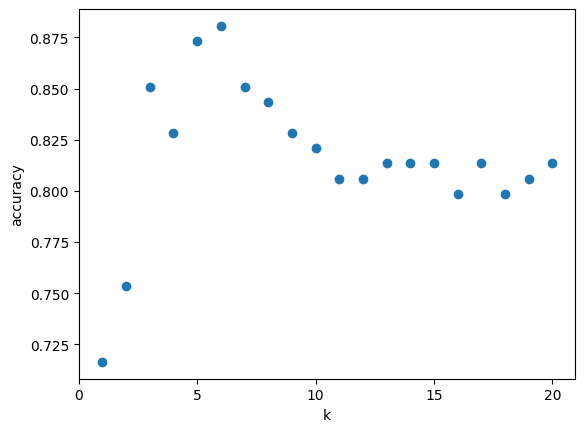

In [19]:
k_range = range(1, 21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_val, y_val))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()


## 4)
   Run through steps 1-3 setting k to 10

In [20]:
train, val, test = prep_titanic()

In [21]:
#defining my train and val subsets

X_train = train.drop(columns = ['survived']).iloc[:, :7]
y_train = train.survived

X_val = val.drop(columns = ['survived']).iloc[:, :7]
y_val = val.survived

In [22]:
#transforming age and fare in both the X_train and X_val subsets using MinMaxScaler()

mms = MinMaxScaler()

X_train[['age', 'fare']] = mms.fit_transform(X_train[['age', 'fare']])
X_val[['age', 'fare']] = mms.transform(X_val[['age', 'fare']])

X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_First
748,0.233476,1,0,0.103644,0,True,True
45,0.346569,0,0,0.015713,1,True,False
28,0.346569,0,0,0.015379,1,False,False
633,0.346569,0,0,0.000000,1,True,True
403,0.346569,1,0,0.030937,0,True,False


In [23]:
#fitting the knn model to my train subset

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
#defining the y predictions

y_pred = knn.predict(X_train)
v_pred = knn.predict(X_val)

### model score

In [25]:
#testing the performance of the train subset

knn.score(X_train, y_train)

0.8218298555377207

In [26]:
#testing the performance of the validate subset

knn.score(X_val, y_val)

0.8208955223880597

### confusion matrix

In [27]:
confusion_matrix(y_train, y_pred)

array([[345,  39],
       [ 72, 167]])

### classification report

In [28]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       384
           1       0.81      0.70      0.75       239

    accuracy                           0.82       623
   macro avg       0.82      0.80      0.81       623
weighted avg       0.82      0.82      0.82       623



### train metrics

In [29]:
t_model2 = theometrics(345, 167, 72, 39)
t_model2

,metric,value
0,Accuracy,0.821830
1,Recall,0.898438
2,True Positive Rate,0.898438
3,False Positive Rate,0.301255
4,True Negative Rate,0.698745
5,False Negative Rate,0.101562
6,Precision,0.827338
7,F1-Score,0.861423
8,Support,384.000000


### val metrics

In [30]:
confusion_matrix(y_val, v_pred)

array([[74,  8],
       [16, 36]])

In [31]:
v_model2 = theometrics(74, 36, 16, 8)
v_model2

,metric,value
0,Accuracy,0.820896
1,Recall,0.902439
2,True Positive Rate,0.902439
3,False Positive Rate,0.307692
4,True Negative Rate,0.692308
5,False Negative Rate,0.097561
6,Precision,0.822222
7,F1-Score,0.860465
8,Support,82.000000


### validate model

In [32]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of KNN classifier on test set: 0.82


## 5) 
Run through steps 1-3 setting k to 20

In [33]:
train, val, test = prep_titanic()

In [34]:
#defining my train and val subsets

X_train = train.drop(columns = ['survived']).iloc[:, :7]
y_train = train.survived

X_val = val.drop(columns = ['survived']).iloc[:, :7]
y_val = val.survived

In [35]:
#transforming age and fare in both the X_train and X_val subsets using MinMaxScaler()

mms = MinMaxScaler()

X_train[['age', 'fare']] = mms.fit_transform(X_train[['age', 'fare']])
X_val[['age', 'fare']] = mms.transform(X_val[['age', 'fare']])

X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_First
748,0.233476,1,0,0.103644,0,True,True
45,0.346569,0,0,0.015713,1,True,False
28,0.346569,0,0,0.015379,1,False,False
633,0.346569,0,0,0.000000,1,True,True
403,0.346569,1,0,0.030937,0,True,False


In [36]:
#fitting the knn model to my train subset

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [37]:
#defining the y predictions

y_pred = knn.predict(X_train)
v_pred = knn.predict(X_val)

### model score

In [38]:
#testing the performance of the train subset

knn.score(X_train, y_train)

0.812199036918138

In [39]:
#testing the performance of the validate subset

knn.score(X_val, y_val)

0.8134328358208955

### confusion matrix

In [40]:
confusion_matrix(y_train, y_pred)

array([[340,  44],
       [ 73, 166]])

### classification report

In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       384
           1       0.79      0.69      0.74       239

    accuracy                           0.81       623
   macro avg       0.81      0.79      0.80       623
weighted avg       0.81      0.81      0.81       623



### train metrics

In [42]:
t_model3 = theometrics(340, 166, 73, 44)
t_model3

,metric,value
0,Accuracy,0.812199
1,Recall,0.885417
2,True Positive Rate,0.885417
3,False Positive Rate,0.305439
4,True Negative Rate,0.694561
5,False Negative Rate,0.114583
6,Precision,0.823245
7,F1-Score,0.853199
8,Support,384.000000


### val metrics

In [43]:
confusion_matrix(y_val, v_pred)

array([[74,  8],
       [17, 35]])

In [44]:
v_model3 = theometrics(74, 35, 17, 8)
v_model3

,metric,value
0,Accuracy,0.813433
1,Recall,0.902439
2,True Positive Rate,0.902439
3,False Positive Rate,0.326923
4,True Negative Rate,0.673077
5,False Negative Rate,0.097561
6,Precision,0.813187
7,F1-Score,0.855491
8,Support,82.000000


In [45]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of KNN classifier on test set: 0.81


## 6) 
 What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [46]:
t_model1['model_2'] = round(t_model2.value * 100)
t_model1['model_3'] = round(t_model3.value * 100)
t_model1 = t_model1.rename(columns = {'value': 'model1'})
t_model1 = t_model1.rename(columns = {'metric': 'IN-SAMPLE____metric'})
t_model1.model1 = round(t_model1.model1 * 100)
t_model1

,IN-SAMPLE____metric,model1,model_2,model_3
0,Accuracy,83.0,82.0,81.0
1,Recall,88.0,90.0,89.0
2,True Positive Rate,88.0,90.0,89.0
3,False Positive Rate,24.0,30.0,31.0
4,True Negative Rate,76.0,70.0,69.0
5,False Negative Rate,12.0,10.0,11.0
6,Precision,85.0,83.0,82.0
7,F1-Score,87.0,86.0,85.0
8,Support,38400.0,38400.0,38400.0


Model 1 performs the best on the in-sample data which concludes that the lower the k_setting(n_neighbors) the better the model performs on the in-sample data.

### 7)
   Which model performs best on our out-of-sample data from validate?

In [47]:
v_model1['model_2'] = round(v_model2.value * 100)
v_model1['model_3'] = round(v_model3.value * 100)
v_model1 = v_model1.rename(columns = {'value': 'model1'})
v_model1 = v_model1.rename(columns = {'metric': 'OUT-OF-SAMPLE____metric'})
v_model1.model1 = round(v_model1.model1 * 100)
v_model1

,OUT-OF-SAMPLE____metric,model1,model_2,model_3
0,Accuracy,87.0,82.0,81.0
1,Recall,93.0,90.0,90.0
2,True Positive Rate,93.0,90.0,90.0
3,False Positive Rate,21.0,31.0,33.0
4,True Negative Rate,79.0,69.0,67.0
5,False Negative Rate,7.0,10.0,10.0
6,Precision,87.0,82.0,81.0
7,F1-Score,90.0,86.0,86.0
8,Support,8200.0,8200.0,8200.0


Model 1 performs the best on the out-of-sample data which concludes that the lower the k_setting(n_neighbors) the better the model performs on the in-sample data.